# Linear Regression Using TensorFlow

## Importing the Relevant Python Libraries

In [1]:
import numpy as np
import tensorflow as tf
import seaborn
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

## Sample Data Generation 

In [2]:
X_data = np.arange(100, step = 0.05)
y_data = X_data + 20 *np.sin(X_data/10 + np.random.normal(0, 10))

## Visualizing the Data

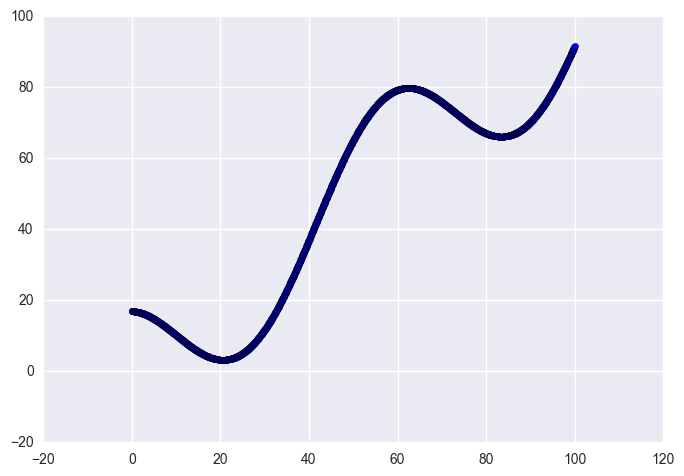

In [3]:
plt.scatter(X_data, y_data)
plt.show()

## Defining Data Size and Batch Size

In [4]:
n_samples = len(X_data)
batch_size = 100

## Univariate Linear Regression

### Setup Placeholders for Input

In [5]:
X_data = np.reshape(X_data, (n_samples, 1))
y_data = np.reshape(y_data, (n_samples, 1))

X = tf.placeholder(tf.float32, shape=(batch_size,1))
y = tf.placeholder(tf.float32, shape=(batch_size,1))

### Defining Variables To Be Learned

In [6]:
with tf.variable_scope("linear-regression"):
    W = tf.get_variable("weights", (1,1), initializer = tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,), initializer = tf.constant_initializer(0.0))
    
    y_pred = tf.matmul(X,W) + b
    loss = tf.reduce_sum((y_pred-y)**2/n_samples)

### Setting Up the Optimization

In [7]:
learn_rate = 0.001
opt = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)

### Tensorflow Session

In [8]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    for _ in range(500):
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]

        _, loss_val = sess.run([opt, loss], feed_dict={X: X_batch, y: y_batch})
        #print(loss_val)

    Weights = sess.run(W)
    Bias = sess.run(b)
    

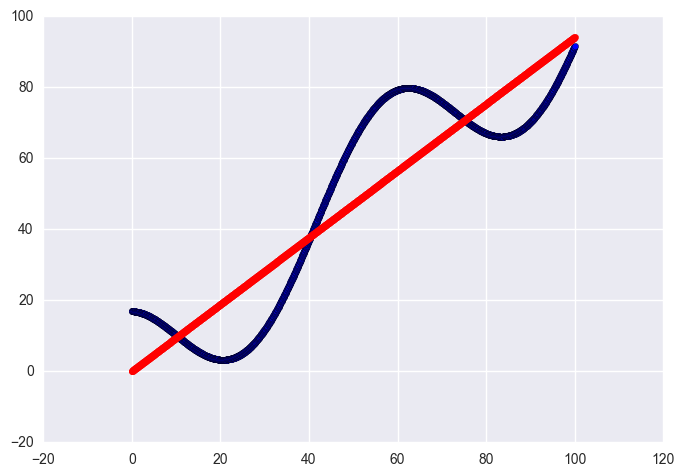

In [9]:
Y_predict = Weights*X_data + Bias
plt.scatter(X_data, y_data)
plt.scatter(X_data, Y_predict, color = 'r')
plt.show()

## Multivariate Linear Regression (3rd Order Polynomial)

### Setting Up Input and Output Data

In [10]:
X_data = (X_data - np.mean(X_data))/np.std(X_data)

Xmul_data=np.array([X_data, X_data**2, X_data**3, X_data**4, X_data**5]).T
Xmul_data=np.reshape(Xmul_data, (n_samples,5))
y_data = (y_data - np.mean(y_data))/np.std(y_data)

### Setting Up Placeholders

In [11]:
Xmul = tf.placeholder(tf.float32, shape=(None, 5))
y = tf.placeholder(tf.float32, shape=(batch_size,1))

### Defining Variables to be Learned

In [12]:
with tf.variable_scope("multilinear-regression"):
    W = tf.get_variable("weights", (5, 1), initializer=tf.random_normal_initializer(0.5, 0.00001))
    b = tf.get_variable("bias", (1, 1), initializer=tf.constant_initializer(0.1))

    y_pred = tf.matmul(Xmul, W) + b
    loss = tf.reduce_mean((y_pred - y) ** 2)

### Setting up the Optimization

In [13]:
opt = tf.train.AdamOptimizer().minimize(loss)

### Tensorflow Session

In [14]:
with tf.Session() as sess:

    sess.run(tf.initialize_all_variables())

    for _ in range(30000):
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = Xmul_data[indices, :], y_data[indices]

        _, loss_val = sess.run([opt, loss], feed_dict={Xmul: X_batch, y: y_batch})
        #print(loss_val)

    prediction = sess.run(y_pred, feed_dict= {Xmul: Xmul_data})

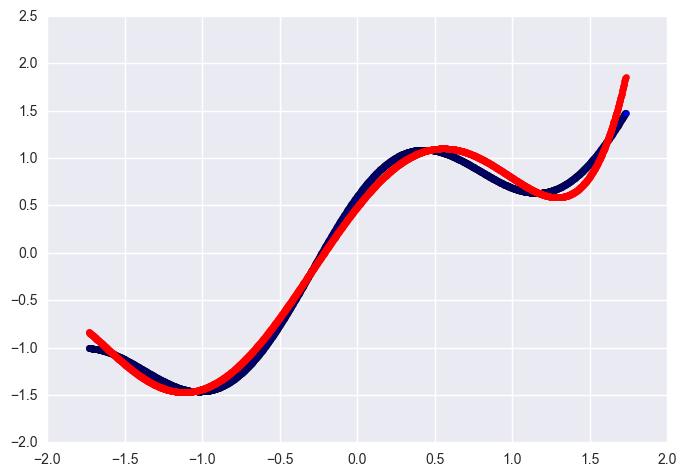

In [15]:
plt.scatter(X_data, y_data)
plt.scatter(X_data, prediction, color = 'r')
plt.show()